In [1]:
import pandas as pd
import os
import numpy as np
import xml.etree.ElementTree as ET
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import signal
%matplotlib inline

## Plotting Raw aim trace

In [2]:
shots_df = pd.read_csv('/cluster/tufts/hugheslab/prath01/projects/MASTRE/datasets/highfreq_features.csv')

outcomes_df = pd.read_csv('/cluster/tufts/hugheslab/prath01/projects/MASTRE/datasets/shot_level_marksmanship_outcomes.csv')

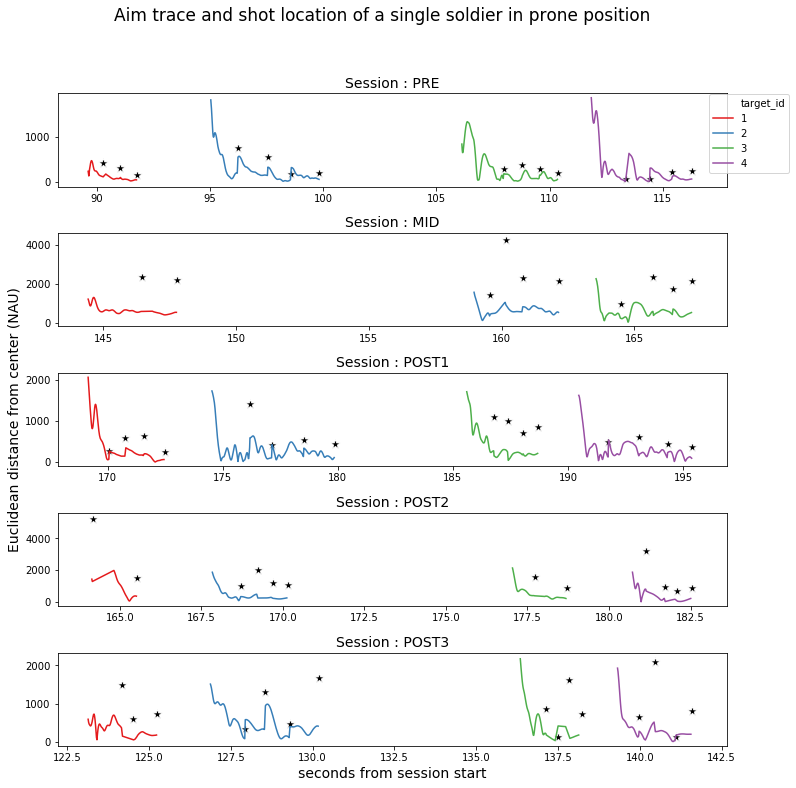

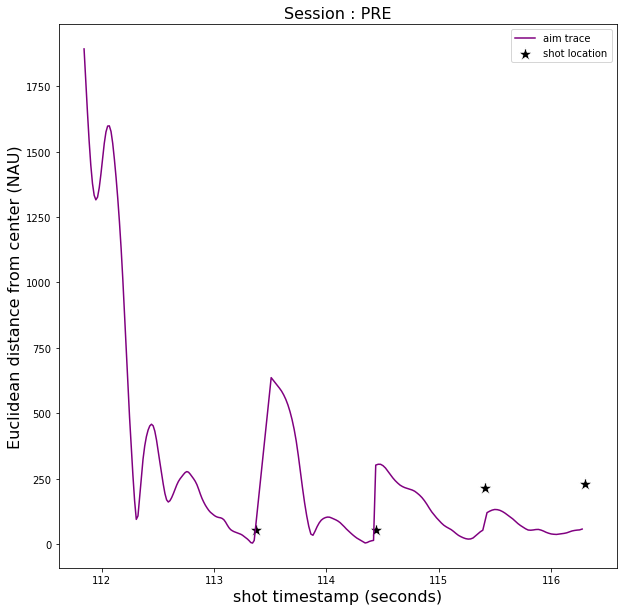

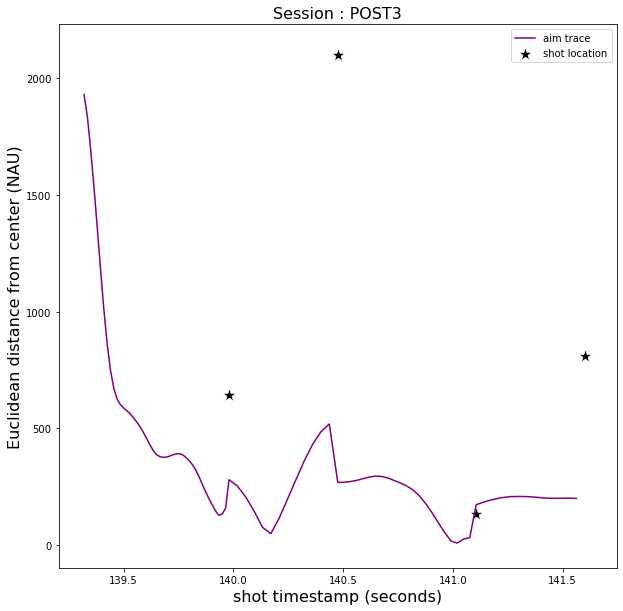

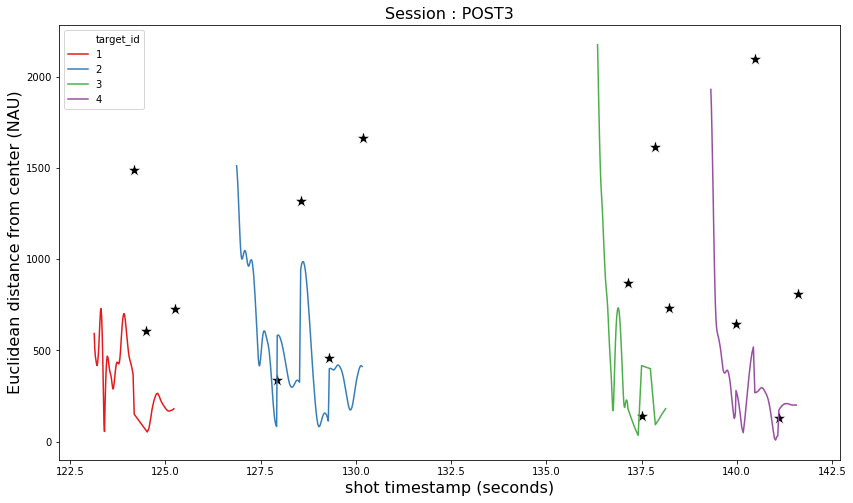

In [3]:

target_list = ['1','2', '3', '4']
select_subject = 1001
select_missions = ['PRE', 'MID', 'POST1', 'POST2','POST3']
select_target = '4'
select_shot = 81
select_standing = 0
position_dict = {0:'prone', 1:'standing'}
fontsize=14

##### plot over all sessions
f,axs = plt.subplots(len(select_missions), 1 , figsize=(12, 12))
for p, select_mission in enumerate(select_missions):
    
    temp_data = shots_df[(shots_df.subject_uid==select_subject)&(shots_df.mission_phase==select_mission)&
                         (shots_df.subject_is_standing==select_standing)&(shots_df.target_id.isin(target_list))]

    sns.lineplot(data=temp_data, x='seconds_from_session_start', y='shot_d_aim_trace', hue='target_id',
                    palette=sns.color_palette("Set1", temp_data.target_id.nunique()), ax = axs[p])

    outcome_data = outcomes_df[(outcomes_df.subject_uid==select_subject)&(outcomes_df.mission_phase==select_mission)&
                               (outcomes_df.target_id.isin(target_list))&(outcomes_df.subject_is_standing==select_standing)]


    sns.scatterplot(data=outcome_data, x='shot_timestamp', y='shot_d_raw', color='k', marker = '*', 
#                     palette=sns.color_palette("Set1", outcome_data.target_id.nunique())
                      s=100,
                      legend=False, ax = axs[p])
    axs[p].set_title('Session : %s'%(select_mission), fontsize=fontsize)
    # axs.plot(t, y, 'k*', label = 'shot_location')
    if p==2:
        axs[p].set_ylabel('Euclidean distance from center (NAU)', fontsize=fontsize)
    else:
        axs[p].set_ylabel('')
        
    if p == len(select_missions)-1:
        axs[p].set_xlabel('seconds from session start', fontsize=fontsize)
    else:
        axs[p].set_xlabel('')
    
    if p ==0:
#         axs[p].legend(loc='upper right')
        axs[p].legend(bbox_to_anchor=(1.1, 1.05))
    else:
        axs[p].get_legend().remove()
    
    plt.subplots_adjust(hspace=0.5)
plt.suptitle('Aim trace and shot location of a single soldier in %s position'%(position_dict[select_standing]),
             fontsize=fontsize+3)
plt.show()
f.savefig('single-subject-shot-trace.png', dpi=300)

###### plot single target
fontsize=16
f,axs = plt.subplots(1,1, figsize=(10, 10))
temp_data = shots_df[(shots_df.subject_uid==select_subject)&(shots_df.mission_phase=='PRE')&
                     (shots_df.subject_is_standing==select_standing)&(shots_df.target_id == select_target)]


outcome_data = outcomes_df[(outcomes_df.subject_uid==select_subject)&(outcomes_df.mission_phase=='PRE')&
                               (outcomes_df.target_id == select_target)&(outcomes_df.subject_is_standing==select_standing)]
sns.lineplot(data=temp_data, x='seconds_from_session_start', y='shot_d_aim_trace', color='purple',
            label = 'aim trace')

sns.scatterplot(data=outcome_data, x='shot_timestamp', y='shot_d_raw', color='k', marker = '*', 
                      s=200, label = 'shot location')
axs.set_title('Session : %s'%('PRE'), fontsize=fontsize)
axs.set_xlabel('shot timestamp (seconds)',fontsize=fontsize)
axs.set_ylabel('Euclidean distance from center (NAU)', fontsize=fontsize)

plt.show()
f.savefig('single-target-shot-trace.png', dpi=300)


###### plot single target
fontsize=16
f,axs = plt.subplots(1,1, figsize=(10, 10))
temp_data = shots_df[(shots_df.subject_uid==select_subject)&(shots_df.mission_phase=='POST3')&
                     (shots_df.subject_is_standing==select_standing)&(shots_df.target_id == select_target)]


outcome_data = outcomes_df[(outcomes_df.subject_uid==select_subject)&(outcomes_df.mission_phase=='POST3')&
                               (outcomes_df.target_id == select_target)&(outcomes_df.subject_is_standing==select_standing)]
sns.lineplot(data=temp_data, x='seconds_from_session_start', y='shot_d_aim_trace', color='purple',
            label = 'aim trace')

sns.scatterplot(data=outcome_data, x='shot_timestamp', y='shot_d_raw', color='k', marker = '*', 
                      s=200, label = 'shot location')
axs.set_title('Session : %s'%('POST3'), fontsize=fontsize)
axs.set_xlabel('shot timestamp (seconds)',fontsize=fontsize)
axs.set_ylabel('Euclidean distance from center (NAU)', fontsize=fontsize)
# axs.set_ylim([0, 750])
plt.show()
f.savefig('single-target-shot-trace-POST3.png', dpi=300)


###### plot single session
fontsize=16
f,axs = plt.subplots(1,1, figsize=(14, 8))
temp_data = shots_df[(shots_df.subject_uid==select_subject)&(shots_df.mission_phase=='POST3')&
                     (shots_df.subject_is_standing==select_standing)&(shots_df.target_id.isin(target_list))]


outcome_data = outcomes_df[(outcomes_df.subject_uid==select_subject)&(outcomes_df.mission_phase=='POST3')&
                               (outcomes_df.target_id.isin(target_list))&
                           (outcomes_df.subject_is_standing==select_standing)]
sns.lineplot(data=temp_data, x='seconds_from_session_start', y='shot_d_aim_trace', hue='target_id',
            palette=sns.color_palette("Set1", temp_data.target_id.nunique()), ax = axs)

sns.scatterplot(data=outcome_data, x='shot_timestamp', y='shot_d_raw', color='k', marker = '*', 
                      s=200,
                      legend=False)

axs.set_title('Session : %s'%('POST3'), fontsize=fontsize)
axs.set_xlabel('shot timestamp (seconds)',fontsize=fontsize)
axs.set_ylabel('Euclidean distance from center (NAU)', fontsize=fontsize)

plt.show()
f.savefig('single-session-shot-trace.png', dpi=300)


## PSD Visualization 

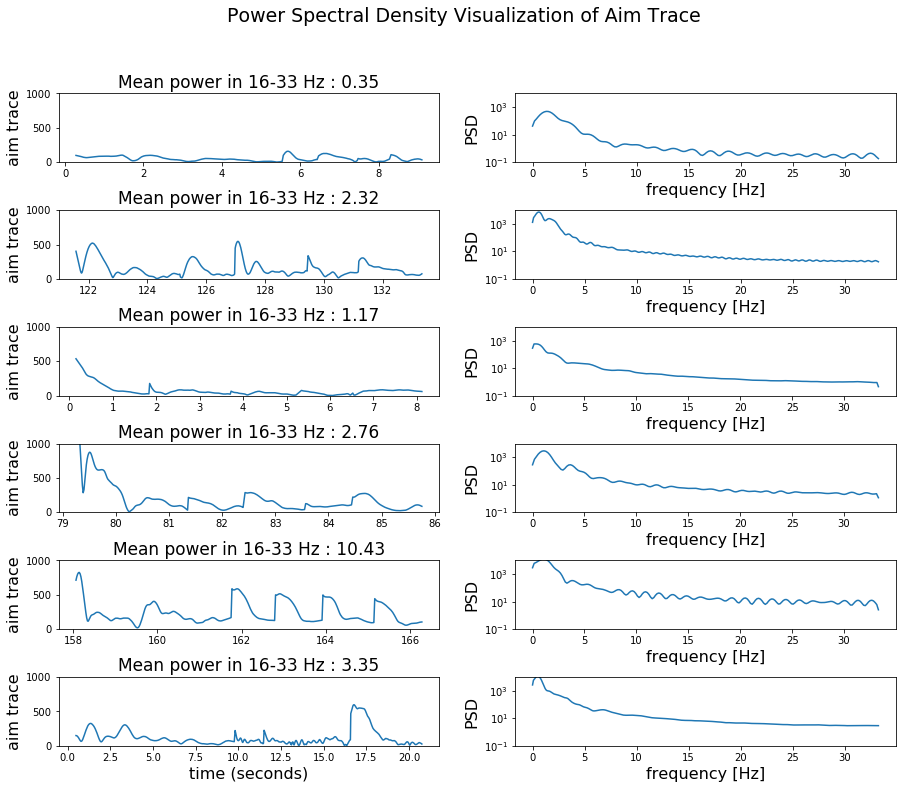

In [10]:
select_subjects = [1001, 1002, 2001, 2002, 2005, 2101]
fig, axs = plt.subplots(len(select_subjects),2, figsize=(15, 12))

for p, select_subject in enumerate(select_subjects):   
    x_df = shots_df[(shots_df.subject_uid==select_subject)&
                 (shots_df.mission_phase==select_mission)&
                 (shots_df.subject_is_standing==select_standing)&
                 (shots_df.target_id == '0-1')]

    t = x_df.seconds_from_session_start.values[10:]
    x = x_df.shot_d_aim_trace.values[10:]

    fs = 66.6

    f, Pxx_den = signal.welch(x, fs, detrend = 'linear', nperseg=len(x)/4, nfft = len(x)+10)
    axs[p,0].plot(t,x)
    if p == len(select_subjects)-1:
        axs[p,0].set_xlabel('time (seconds)', fontsize=fontsize)
    axs[p,0].set_ylabel('aim trace', fontsize=fontsize)
    axs[p,0].set_ylim([0, 1000])
    axs[p,0].set_title('Mean power in 16-33 Hz : %.2f'%(np.median(Pxx_den[int(len(Pxx_den)/2):])), fontsize=fontsize+1)
    axs[p,1].semilogy(f, Pxx_den)
    axs[p,1].set_ylim([10**-1,10**4])
    axs[p,1].set_xlabel('frequency [Hz]', fontsize=fontsize)
    axs[p,1].set_ylabel('PSD', fontsize=fontsize)
    
plt.suptitle('Power Spectral Density Visualization of Aim Trace', fontsize=fontsize+3)
plt.subplots_adjust(hspace = 0.7)
plt.show()
fig.savefig('PSD_Visualization.png', dpi=300)

In [3]:
target_list = ['1','2', '3', '4']
select_subject = 1001
select_missions = ['PRE', 'MID', 'POST1', 'POST2','POST3']
select_target = '4'
select_shot = 81
select_standing = 0
position_dict = {0:'prone', 1:'standing'}
fontsize=14




In [4]:
outcome_data = outcomes_df[(outcomes_df.subject_uid==select_subject)&(outcomes_df.mission_phase=='PRE')&
                               (outcomes_df.target_id == select_target)&(outcomes_df.subject_is_standing==select_standing)]

In [5]:
outcome_data

,subject_uid,target_id,shot_id,mission_phase,subject_is_standing,aiming_time,shot_x_75,shot_y_75,shot_d_75,shot_x_150,shot_y_150,shot_d_150,shot_x_raw,shot_y_raw,shot_d_raw,shot_timestamp
244,1001,4,28.0,PRE,0.0,1.530,-13.3,-0.9,3.651084,-26.6,-1.8,5.163413,-54.0,-4.0,7.358529,113.372868
245,1001,4,29.0,PRE,0.0,0.930,-12.8,-4.4,3.679013,-25.6,-8.8,5.202911,-52.0,-18.0,7.418037,114.438934
246,1001,4,30.0,PRE,0.0,0.975,-52.4,2.9,7.244321,-104.8,5.8,10.245017,-212.0,12.0,14.571868,115.414910
247,1001,4,31.0,PRE,0.0,0.870,36.3,43.8,7.542347,72.6,87.6,10.666489,147.0,177.0,15.168474,116.300796


In [9]:
outcomes_df[(outcomes_df.subject_uid==1001)&(outcomes_df.target_id=='4')&(outcomes_df.subject_is_standing==select_standing)]

,subject_uid,target_id,shot_id,mission_phase,subject_is_standing,aiming_time,shot_x_75,shot_y_75,shot_d_75,shot_x_150,shot_y_150,shot_d_150,shot_x_raw,shot_y_raw,shot_d_raw,shot_timestamp
35,1001,4,49.0,MID,0.0,0.930,234.1,-49.7,15.469892,468.2,-99.4,21.877732,946.0,-201.0,31.098519,164.486922
36,1001,4,50.0,MID,0.0,1.185,391.0,434.8,24.181595,782.0,869.6,34.197940,1580.0,1757.0,48.610002,165.718153
37,1001,4,51.0,MID,0.0,0.735,259.3,337.5,20.630285,518.6,675.0,29.175629,1048.0,1364.0,41.474285,166.453889
38,1001,4,52.0,MID,0.0,0.720,396.0,350.4,22.994968,792.0,700.8,32.519795,1600.0,1416.0,46.223362,167.174610
67,1001,4,47.0,POST1,0.0,1.290,-102.2,66.5,11.042222,-204.4,133.0,15.616061,-413.0,269.0,22.200885,191.754970
68,1001,4,48.0,POST1,0.0,1.335,-144.5,-48.5,12.345935,-289.0,-97.0,17.459789,-584.0,-196.0,24.819609,193.091306
69,1001,4,49.0,POST1,0.0,1.230,-75.7,-74.9,10.319486,-151.4,-149.8,14.593957,-306.0,-303.0,20.751705,194.322538
70,1001,4,50.0,POST1,0.0,1.065,-83.1,-39.6,9.594430,-166.2,-79.2,13.568573,-336.0,-160.0,19.291203,195.388604
150,1001,4,57.0,POST2,0.0,0.420,-440.5,-655.8,28.107095,-881.0,-1311.6,39.749435,-1780.0,-2650.0,56.500610,181.138619
151,1001,4,58.0,POST2,0.0,0.585,199.4,119.7,15.250221,398.8,239.4,21.567069,806.0,484.0,30.661952,181.724204


In [10]:
np.sqrt(1580**2 + 1757**2)

2362.9322884924145